# Toy problem in google Colab

### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url='http://bit.ly/w-data'
s_data=pd.read_csv(url)
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Finding positive relation

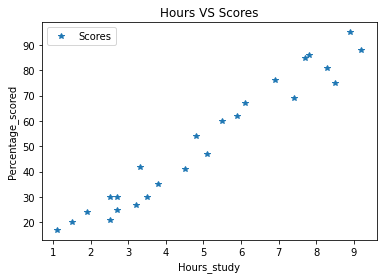

In [3]:
s_data.plot(x='Hours',y='Scores',style='*')
plt.title('Hours VS Scores')
plt.xlabel('Hours_study')
plt.ylabel('Percentage_scored')
plt.show()

In [4]:
X=s_data.iloc[:,:-1].values
Y=s_data.iloc[:,1].values

In [5]:
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Train, Test SPLIT

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

### Training an algorithm

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
Regressor1=LinearRegression()
Regressor1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
## Ploting the regression Line

line= Regressor1.coef_*X+Regressor1.intercept_

In [11]:
print(line)


[[26.92318188]
 [52.3402707 ]
 [33.76624426]
 [85.57800223]
 [36.69898527]
 [17.14737849]
 [92.4210646 ]
 [56.25059205]
 [83.62284155]
 [28.87834256]
 [77.75735951]
 [60.16091341]
 [46.47478866]
 [34.74382459]
 [13.23705714]
 [89.48832358]
 [26.92318188]
 [21.05769985]
 [62.11607409]
 [74.8246185 ]
 [28.87834256]
 [49.40752968]
 [39.63172629]
 [69.9367168 ]
 [78.73493985]]


In [13]:
print(Regressor1.coef_)
print(Regressor1.intercept_)

[9.77580339]
2.48367340537321


### Ploting for testing

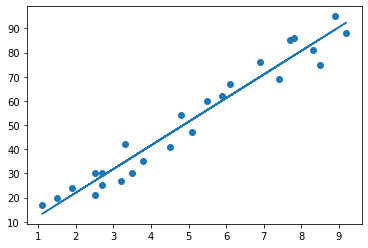

In [14]:
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

## Prediction

In [15]:
print(X_test)
y_pred = Regressor1.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
df = pd.DataFrame({'Actual':Y_test,'Predected':y_pred})
df

,Actual,Predected
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


In [19]:
print("Training score", Regressor1.score(X_train,Y_train))
print("Testing score", Regressor1.score(X_test,Y_test))


Training score 0.9512837351709387
Testing score 0.9491748734859172


### Ploting the bar char to depict the actual predicted value

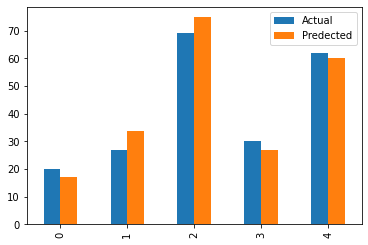

In [20]:
 df.plot(kind='bar')
 plt.show()

### Predicting for dynamic value

In [23]:
hours=9.75
test=np.array([hours])
test = test.reshape(-1,1)
own_pred= Regressor1.predict(test)
print("No of hours= {}".format(hours))
print("Score_predicte= {}".format(own_pred[0]))

No of hours= 9.75
Score_predicte= 97.79775646555102


### Model_Evaluation

In [25]:
from sklearn import metrics
print('Mean Absolute Error : ',metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Square Error : ',metrics.mean_squared_error(Y_test,y_pred))
print('Root Mean Square Error : ',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('Explained varaince score : ',metrics.explained_variance_score(Y_test,y_pred))

Mean Absolute Error :  4.071877793635605
Mean Square Error :  20.138948129940175
Root Mean Square Error :  4.487643939746131
Explained varaince score :  0.9515224335188082
